Centroids: [[2. 2.]
 [9. 9.]]
    X   Y  Cluster
0   1   1        0
1   2   2        0
2   3   3        0
3   8   8        1
4   9   9        1
5  10  10        1


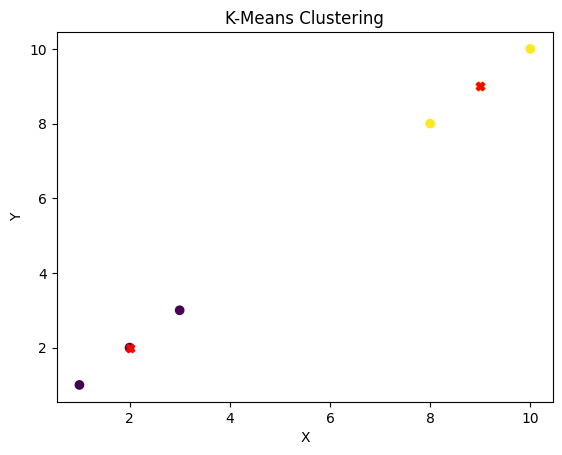

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
# داده‌ها را آماده کنید
data = {'X': [1, 2, 3, 8, 9, 10],
        'Y': [1, 2, 3, 8, 9, 10]}
df = pd.DataFrame(data)
# ایجاد مدل K-میانگین با 2 خوشه
kmeans = KMeans(n_clusters=2, random_state=42)
# آموزش مدل
kmeans.fit(df)
# پیش‌بینی خوشه‌ها
df['Cluster'] = kmeans.predict(df)
# نمایش مراکز خوشه‌ها
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
print(f'Centroids: {centroids}')
print(df)
# ترسیم داده‌ها و خوشه‌ها
plt.scatter(df['X'], df['Y'], c=df['Cluster'], cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X')
plt.title('K-Means Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


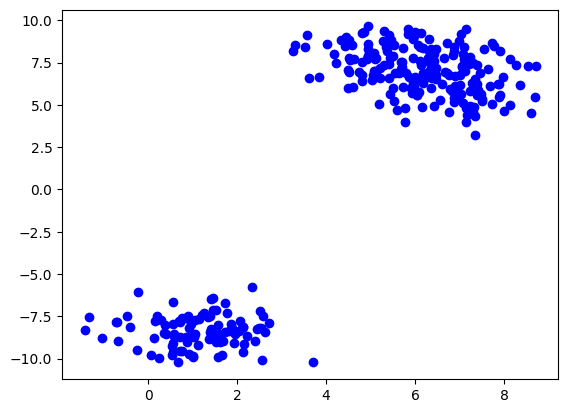

In [12]:
X, Y = make_blobs(n_samples=300, n_features=2, centers=3)
plt.scatter(X[:, 0], X[:, 1], color="b")
plt.show()

In [13]:
model = KMeans(n_clusters=3)
model.fit(X)

KMeans(n_clusters=3)

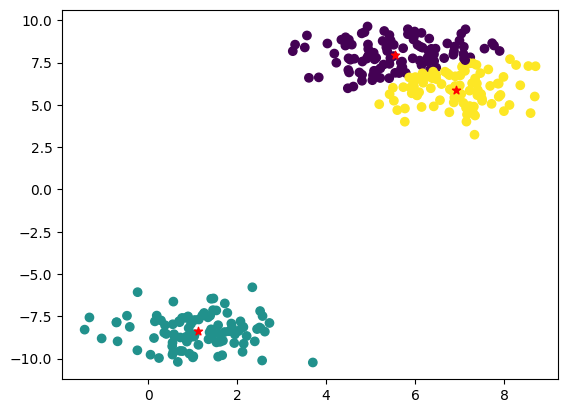

In [14]:
centers= model.cluster_centers_
labels = model.labels_

plt.scatter(X[:,0], X[:,1],c=labels)
plt.scatter(centers[:, 0], centers[:, 1], c="red", marker="*")
plt.show()

# DBSCAN 

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans


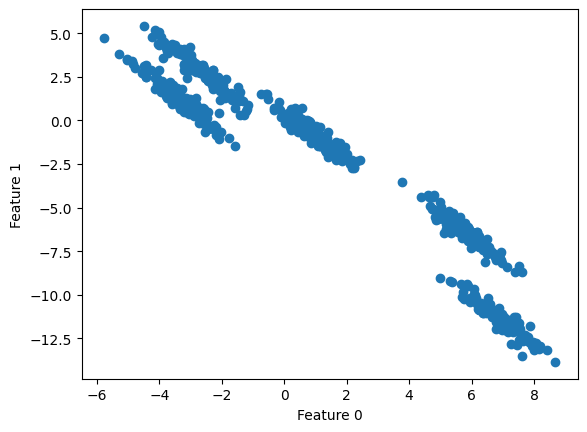

In [16]:

# generate some random cluster data
X, y = make_blobs(random_state=170, n_samples=600, centers = 5)
rng = np.random.RandomState(74)
# transform the data to be stretched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# plot
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

Text(0, 0.5, 'Feature 1')

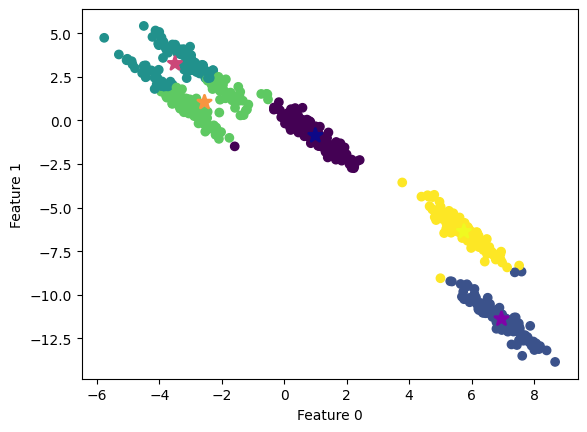

In [17]:
kmeans = KMeans(n_clusters=5,random_state=42)
kmeans.fit(X)
centers=kmeans.cluster_centers_
# labels= kmeans.labels_
y_pred=kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap="viridis")
plt.scatter(centers[:, 0],   
            centers[:, 1],
            marker='*', 
            c=[0, 1, 2, 3, 4], 
            s=100, 
            linewidth=2,
            cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

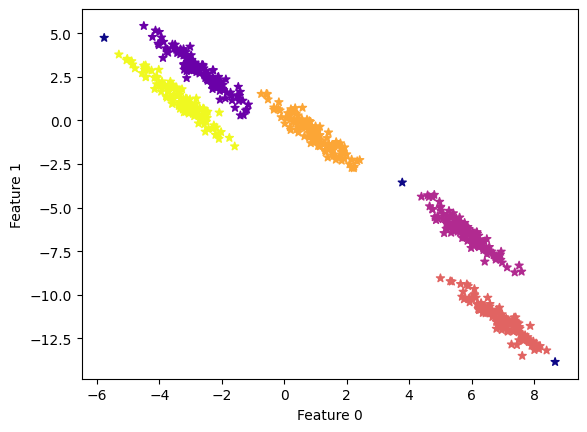

In [18]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
dbscan = DBSCAN(eps=0.123, min_samples=2)
clusters=dbscan.fit_predict(X_scaled)
plt.scatter(X[:,0], X[:,1], marker="*",c=clusters,cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()


In [19]:
from sklearn.metrics.cluster import adjusted_rand_score
#k-means performance:
print("ARI =", adjusted_rand_score(y, y_pred).__round__(2))
# ARI = 0.76
#DBSCAN performance:
print("ARI =", adjusted_rand_score(y, clusters).__round__(2))
# ARI = 0.99

ARI = 0.75
ARI = 0.99


# Chameleon



یک روش خوشه‌بندی است که برای شناسایی خوشه‌ها در داده‌های چندبعدی پیچیده طراحی شده است. این الگوریتم از ویژگی‌هایی مانند شکل، چگالی،
 
و فاصله بین نقاط برای بهبود خوشه‌بندی استفاده می‌کند.
  
از دو مرحله اصلی تشکیل شده است:




1. **تشکیل خوشه‌های اولیه (پایین-بالا)**:

      (KNN) یا (graph partitioning) در این مرحله، از یک روش خوشه‌بندی محلی مانند  
      
      برای ایجاد خوشه‌های اولیه استفاده می‌شود

      (sub-clusters) . هر یک از این خوشه‌ها به صورت یک گراف مدل می‌شود.



2. **ادغام خوشه‌ها (بالا-پایین)**:

      در مرحله دوم، خوشه‌های کوچک‌تر با توجه به ویژگی‌های داخلی و خارجی شان ادغام می‌شوند تا خوشه‌های بزرگ‌تر بدون محدودیت شکلی به دست آیند.




![My Image](../images/chameleon.jpg)



1. **مجموعه داده‌ها (Data Set)**: 

      در ابتدا، مجموعه‌ای از داده‌ها داریم که می‌خواهیم آن‌ها را خوشه‌بندی کنیم.


2. **گراف همسایگان نزدیک (K-nearest neighbor graph)**:

      در این مرحله، داده‌ها به یک گراف تبدیل می‌شوند که در آن هر نقطه‌ی داده به کا نقطه‌ی نزدیک‌ترین خود متصل می‌شود. این گراف به ما کمک 
      
      می‌کند که ساختار داده‌ها و ارتباطات بین آن‌ها را بهتر درک کنیم.


3. **مرحله تقسیم (Partition)**:

      در این مرحله، داده‌ها بر اساس گراف همسایگان نزدیک به خوشه‌های کوچک‌تر تقسیم می‌شوند.
      

4. **مرحله ادغام (Merge)**:

      بعد از تقسیم، خوشه‌های کوچک با هم بررسی می‌شوند و بر اساس شباهت و فاصله‌ی کلاسترها، خوشه‌های نهایی بزرگ‌تری ایجاد می‌شود. این 
      
      مرحله کمک می‌کند تا خوشه‌های با کیفیت و مناسب‌تری داشته باشیم.

      



برای درک بهتر این الگوریتم، بیایید با یک مثال شروع کنیم:

### مثال ساده

 فرض کنید یک مجموعه داده داریم که شامل نقاط دوبعدی است و هدف ما شناخت خوشه‌ها در این داده‌هاست.

ابتدا نقاط را با فاصله اقلیدسی به هم متصل کرده و یک گراف غیر جهت‌دار از داده‌ها تهیه می‌کنیم. برای ساده‌سازی، از نقاط دو بعدی زیر 

استفاده می‌کنیم:

\[ 
\{(2, 3), (3, 3), (2, 4), (8, 8), (9, 8), (8, 9)\} 
\]

#### مرحله 1: تشکیل خوشه‌های اولیه

- با استفاده از روشی مثل KNN، نقاط نزدیک به هم را به جفت‌هایی از زیرخوشه‌ها تقسیم می‌کنیم: 

  - زیرخوشه اول: \((2, 3), (3, 3), (2, 4)\)
  - زیرخوشه دوم: \((8, 8), (9, 8), (8, 9)\)

#### مرحله 2: ادغام خوشه‌ها

برای ادغام خوشه‌های اولیه دو معیار اصلی در نظر گرفته می‌شود:

1. **Similar Connectivity**:

      که به نسبت تعداد لبه‌های واقع شده در خوشه و تعداد لبه‌های ممکن (بر اساس چگالی خوشه‌های اولیه) نگاه می‌کند.

2. **Relative Closeness**:

      که فاصله میانگین جفت نقاط در خوشه جدید نسبت به خوشه‌های اولیه را می‌سنجد.

در مثال ما، خوشه‌های مشخص شده به خوبی جدا شده‌اند و نیازی به ادغام بیشتر نیست.

اما اگر معیارهای بالا برآورده نمی‌شد، الگوریتم تلاش می‌کند تا زیرخوشه‌ها را بر اساس ویژگی‌های اتصال و نزدیکی به هم ادغام کند.





بیایید یک مثال عددی ساده از داده‌ها و مراحل خوشه‌بندی آن‌ها را بررسی کنیم.



### فرضیات:
فرض کنید ما یک مجموعه داده داریم که شامل 10 نقطه داده به شکل زیر است:

| داده‌ها    | X      | Y      |
|------------|--------|--------|
| نقطه 1    | 1      | 2      |
| نقطه 2    | 1      | 4      |
| نقطه 3    | 1      | 0      |
| نقطه 4    | 5      | 2      |
| نقطه 5    | 5      | 3      |
| نقطه 6    | 5      | 0      |
| نقطه 7    | 9      | 2      |
| نقطه 8    | 9      | 3      |
| نقطه 9    | 9      | 0      |
| نقطه 10   | 1      | 1      |

### مراحل الگوریتم Chameleon:

1. **گراف همسایگان نزدیک**:
   - در اینجا فرض کنیم K=3، یعنی هر نقطه به 3 همسایه نزدیک‌ترین خود متصل می‌شود. مثلاً:
     - نقطه 1 به نقاط 2، 10 و 3 متصل می‌شود.
     - نقطه 4 به نقاط 5 و 6 متصل می‌شود.

2. **تقسیم (Partition)**:
   - بر اساس گراف همسایگان نزدیک، خوشه‌های اولیه تشکیل می‌شوند. فرض کنید خوشه‌های اولیه ما به صورت زیر هستند:
     - خوشه 1: {نقطه 1، 2، 3، 10}
     - خوشه 2: {نقطه 4، 5، 6}
     - خوشه 3: {نقطه 7، 8، 9}

3. **ادغام (Merge)**:
   - حالا خوشه‌ها باید بر اساس فاصله و شباهت ادغام شوند. فرض کنید خوشه 1 و خوشه 2 فاصله کمی دارند و به هم نزدیک هستند. پس آن‌ها با هم ادغام می‌شوند.
   - خوشه نهایی به شکل زیر خواهد بود:
     - خوشه نهایی 1: {نقطه 1، 2، 3، 10، 4، 5، 6}
     - خوشه نهایی 2: {نقطه 7، 8، 9}

4. **خوشه‌های نهایی**:
   - در پایان، ما دو خوشه نهایی داریم که نشان‌دهنده گروه‌های مختلف داده‌ها هستند.



### فرمول فاصله اقلیدسی
![My Image](../images/oghlidosi.png)

### محاسبه فاصله‌ها

#### جدول فاصله‌ها

|     | نقطه 1 (1, 2) | نقطه 2 (1, 4) | نقطه 3 (1, 0) | نقطه 4 (5, 2) | نقطه 5 (5, 3) | نقطه 6 (5, 0) | نقطه 7 (9, 2) | نقطه 8 (9, 3) | نقطه 9 (9, 0) | نقطه 10 (1, 1) |
|-----|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|----------------|
| **نقطه 1** | 0            | 2            | 2            | 4          | 4.24        | 4            | 8.06        | 8.24        | 8.00        | 1              |
| **نقطه 2** | 2            | 0            | 4            | 4.47       | 3.16        | 4.12         | 8.06        | 7.28        | 8.00        | 3              |
| **نقطه 3** | 2            | 4            | 0            | 4          | 4.24        | 5            | 8.06        | 8.24        | 9.00        | 1              |
| **نقطه 4** | 4            | 4.47         | 4            | 0          | 1          | 2            | 4           | 5           | 6.32        | 4              |
| **نقطه 5** | 4.24         | 3.16         | 4.24         | 1          | 0          | 3            | 4           | 4.12        | 6.08        | 4.24           |
| **نقطه 6** | 4            | 4.12         | 5            | 2          | 3          | 0            | 4.47        | 5.00        | 5.00        | 4.00           |
| **نقطه 7** | 8.06         | 8.06         | 8.06         | 4          | 4           | 4.47        | 0           | 1           | 9.00        | 8.06           |
| **نقطه 8** | 8.24         | 7.28         | 8.24         | 5          | 4.12        | 5.00        | 1           | 0           | 9.00        | 7.28           |
| **نقطه 9** | 8.00         | 8.00         | 9.00         | 6.32       | 6.08        | 5.00        | 9.00        | 9.00        | 0           | 8.00           |
| **نقطه 10**| 1            | 3            | 1            | 4          | 4.24        | 4.00          | 8.06        | 7.28        | 8.00          | 0              |




### نتیجه‌گیری:
در این مثال، ما توانستیم با استفاده از این الگوریتم  داده‌ها را به دو خوشه اصلی تقسیم کنیم که نشان‌دهنده ساختار و روابط بین داده‌ها هستند. این روش کارایی بالایی در خوشه‌بندی داده‌های با ابعاد بالا دارد و می‌تواند الگوهای مهمی را شناسایی کند.


### ویژگی‌ها و مزایا

- **انعطاف‌پذیری بالا**:

 Chameleon می‌تواند شکل‌ها و چگالی‌های مختلف خوشه‌ها را به خوبی تشخیص دهد.
- **دقت بیشتر در خوشه‌بندی**:

 با استفاده از اطلاعات داخلی و خارجی خوشه‌ها برای ادغام، نتایج بهتری در مقایسه با روش‌های سنتی ارائه می‌دهد.






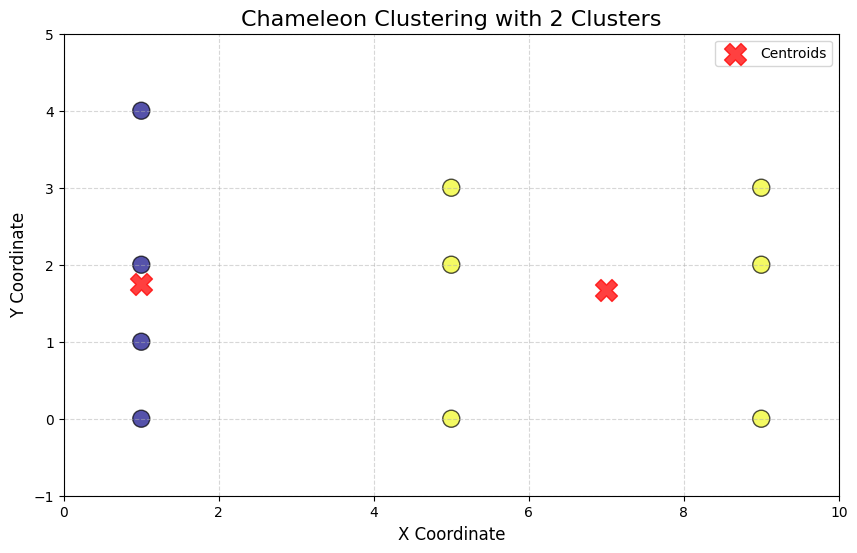

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# داده‌ها را به صورت آرایه NumPy تعریف می‌کنیم
data = np.array([
    [1, 2],  # نقطه 1
    [1, 4],  # نقطه 2
    [1, 0],  # نقطه 3
    [5, 2],  # نقطه 4
    [5, 3],  # نقطه 5
    [5, 0],  # نقطه 6
    [9, 2],  # نقطه 7
    [9, 3],  # نقطه 8
    [9, 0],  # نقطه 9
    [1, 1]   # نقطه 10
])

# تعیین تعداد خوشه‌ها برای خوشه‌بندی اولیه به 2
num_initial_clusters = 2

# خوشه‌بندی اولیه با K-Means
kmeans = KMeans(n_clusters=num_initial_clusters)
initial_labels = kmeans.fit_predict(data)

# تابع برای ادغام خوشه‌ها
def merge_clusters(data, labels, distance_threshold):
    unique_labels = np.unique(labels)
    new_labels = labels.copy()
    
    # ادغام خوشه‌ها بر اساس فاصله
    for i in range(len(unique_labels)):
        for j in range(i + 1, len(unique_labels)):
            if unique_labels[i] != unique_labels[j]:  # اگر خوشه‌ها متفاوت باشند
                cluster_i = data[labels == unique_labels[i]]
                cluster_j = data[labels == unique_labels[j]]
                mean_i = np.mean(cluster_i, axis=0)
                mean_j = np.mean(cluster_j, axis=0)
                
                # محاسبه فاصله اقلیدسی بین خوشه‌ها
                distance = np.linalg.norm(mean_i - mean_j)
                
                if distance < distance_threshold:
                    # ادغام خوشه‌ها
                    new_labels[new_labels == unique_labels[j]] = unique_labels[i]
                    
    return new_labels

# ادغام خوشه‌ها با آستانه فاصله کمتر
distance_threshold = 3  # می‌توانید این فاصله را تنظیم کنید
final_labels = merge_clusters(data, initial_labels, distance_threshold)

# نمایش نتایج نهایی با طراحی بهبود یافته
plt.figure(figsize=(10, 6))  # تغییر اندازه شکل
plt.scatter(data[:, 0], data[:, 1], c=final_labels, s=150, cmap='plasma', edgecolor='k', alpha=0.7)  # اضافه کردن لبه‌ها و تنظیم اندازه
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=250, alpha=0.75, marker='X', label='Centroids')  # نمایش مراکز
plt.title("Chameleon Clustering with 2 Clusters", fontsize=16)
plt.xlabel("X Coordinate", fontsize=12)
plt.ylabel("Y Coordinate", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)  # بهبود شبکه
plt.legend()
plt.xlim(0, 10)  # تنظیم حدود محور X
plt.ylim(-1, 5)  # تنظیم حدود محور Y
plt.show()


# Internal Measures

معیارهای داخلی ابزارهایی هستند که به منظور ارزیابی کیفیت خوشه‌بندی در تحلیل خوشه‌ای به کار می‌روند. این معیارها به ما کمک می‌کنند تا بفهمیم که آیا خوشه‌ها به درستی شکل گرفته‌اند و چگونه می‌توانند نقاط داده را با هم گروه‌بندی کنند. در واقع، معیارهای داخلی با اندازه‌گیری ویژگی‌های خود خوشه‌ها (بدون نیاز به برچسب‌های خارجی یا معیارهای مقایسه‌ای) به ارزیابی کیفیت خوشه‌بندی می‌پردازند.
در زیر به توضیح چند معیار داخلی رایج می‌پردازیم

### 1.Silhouette Score
نرخ سیلوئت یک معیار معروف برای سنجش یکپارچگی و تفکیک‌پذیری خوشه‌ها است. این معیار برای هر نقطه محاسبه می‌شود و نشان می‌دهد که یک نقطه 
چگونه به خوشه خود نزدیک است در مقایسه با نزدیک‌ترین خوشه دیگر. 

![My Image](../images/internal-measure.png)

### 2. شاخص کالینسینس-هاراباز (Calinski-Harabasz Index)
این شاخص نسبت واریانس میان خوشه‌ها به واریانس درون خوشه‌ها را اندازه‌گیری می‌کند. این معیار به ما می‌گوید که خوشه‌ها به چه میزان از هم فاصله دارند و چه مقدار یکپارچگی دارند.

![My Image](../images/Calinski-Harabasz.png)

### 3. Davies-Bouldin Index
این معیار نیز به مقایسه خوشه‌ها می‌پردازد و نسبت شباهت خوشه‌ها را اندازه‌گیری می‌کند. به این صورت که هر خوشه را با نزدیک‌ترین خوشه به آن مقایسه می‌کند:

- **محاسبه**:
  - برای هر خوشه:
    - محاسبه میانگین فاصله نقاط درون خوشه.
    - محاسبه فاصله میان مراکز تحت خوشه.
  - مقادیر پایین‌تر نشان‌دهنده تفکیک بهتر خوشه‌ها هستند.

### کاربردها
این معیارها معمولاً در تجزیه و تحلیل خوشه‌ای برای مقایسه و انتخاب بهترین تعداد خوشه‌ها (یا ارزیابی نتایج خوشه‌بندی) استفاده می‌شوند. آن‌ها به پژوهشگران و تحلیلگران کمک می‌کنند تا فعلیت خوشه‌بندی خود را تأیید کنند و نقاط قوت و ضعف الگوریتم‌های مختلف را بشناسند.

### نتیجه‌گیری
استفاده از معیارهای داخلی در ارزیابی خوشه‌بندی می‌تواند دیدگاه دقیقی از کیفیت تحلیل خوشه‌ای ارائه دهد و به تصمیم‌گیری‌های داده‌محور کمک کند. این معیارها می‌توانند به ویژه در شرایطی که برچسب‌های دسته‌بندی موجود نیستند، بسیار مؤثر باشند.

Silhouette Score: 0.51
Calinski-Harabasz Index: 16.43


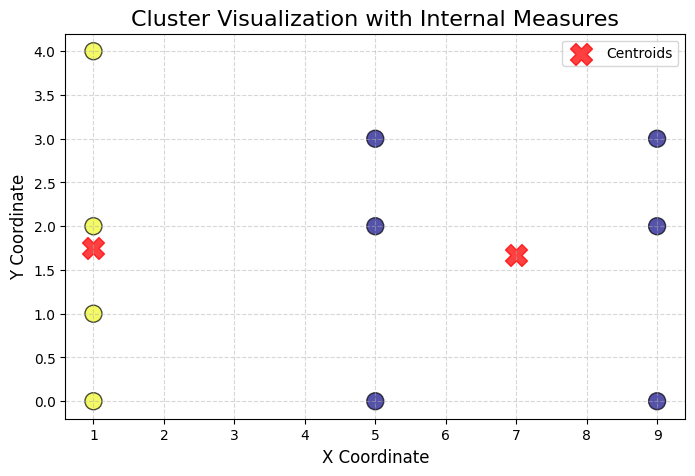

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# داده‌ها را به صورت آرایه NumPy تعریف می‌کنیم
data = np.array([
    [1, 2],
    [1, 4],
    [1, 0],
    [5, 2],
    [5, 3],
    [5, 0],
    [9, 2],
    [9, 3],
    [9, 0],
    [1, 1]
])

# تشکیل خوشه با K-Means
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters)
labels = kmeans.fit_predict(data)

# محاسبه معیارهای داخلی
silhouette_avg = silhouette_score(data, labels)
calinski_harabasz_avg = calinski_harabasz_score(data, labels)

# نمایش نتایج معیارها
print(f"Silhouette Score: {silhouette_avg:.2f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_avg:.2f}")

# نمایش نمودار خوشه‌ها
plt.figure(figsize=(8, 5))
plt.scatter(data[:, 0], data[:, 1], c=labels, s=150, cmap='plasma', edgecolor='k', alpha=0.7)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=250, alpha=0.75, marker='X', label='Centroids')
plt.title("Cluster Visualization with Internal Measures", fontsize=16)
plt.xlabel("X Coordinate", fontsize=12)
plt.ylabel("Y Coordinate", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()
